In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!pip install pytesseract

import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas

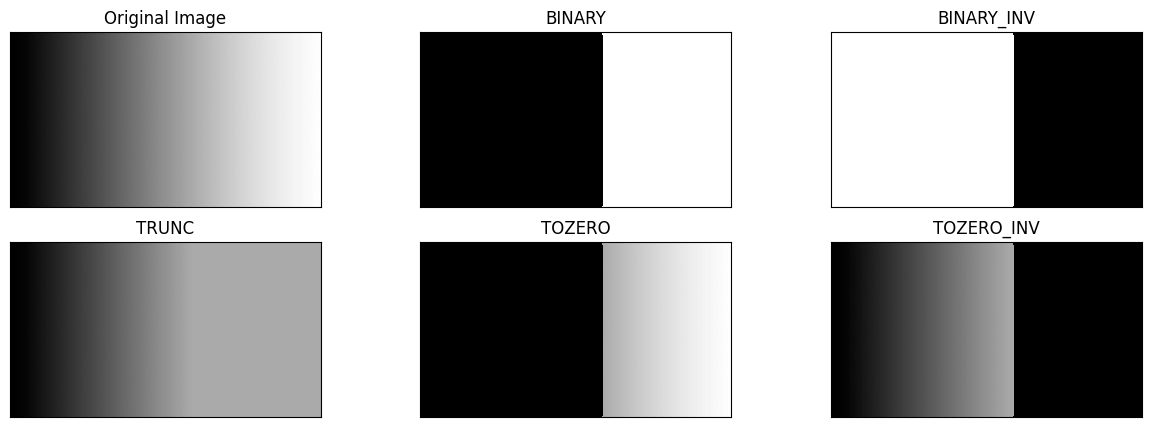

In [93]:
filename = ('/content/drive/MyDrive/content/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0
  #2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library
  #3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library
  #4. Threshold Tozero
thresh4[img<=thresh] =0 #tanpa library
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',
  interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-94-076ffff7293a>:28: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


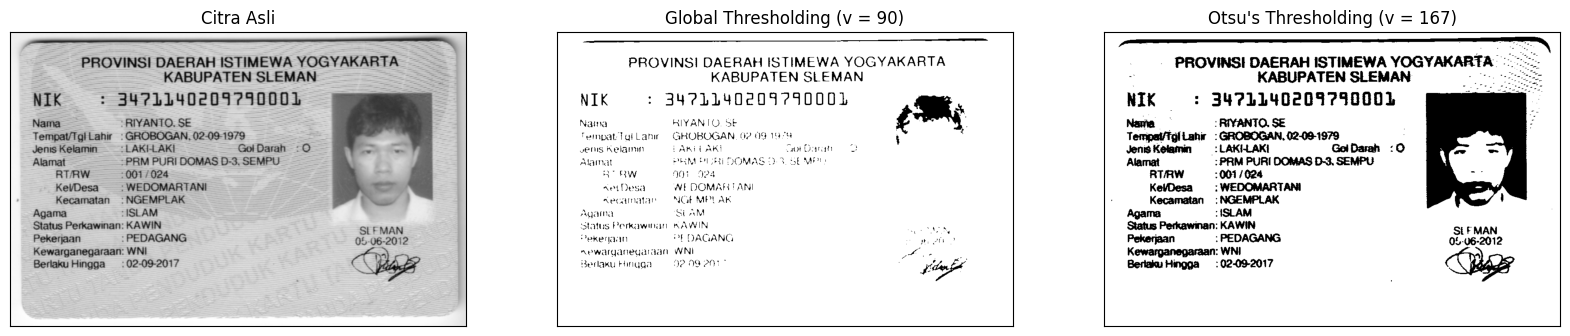

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename_1 = '/content/drive/MyDrive/content/ktpRiyanto.png'
img_lgs = cv2.imread(filename_1, 0)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img_lgs, (5, 5), 0)

# Calculate the histogram
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])

hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img_lgs.shape[0] * img_lgs.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)

    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

# Change the threshold value to 167
thresh = 167

x = "Otsu's Thresholding (v = " + str(thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(20, 15))

for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
### Petunjuk:
1. anda dapat gunakan cv.calcHist untuk menampilkan histogram
2. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
3. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).







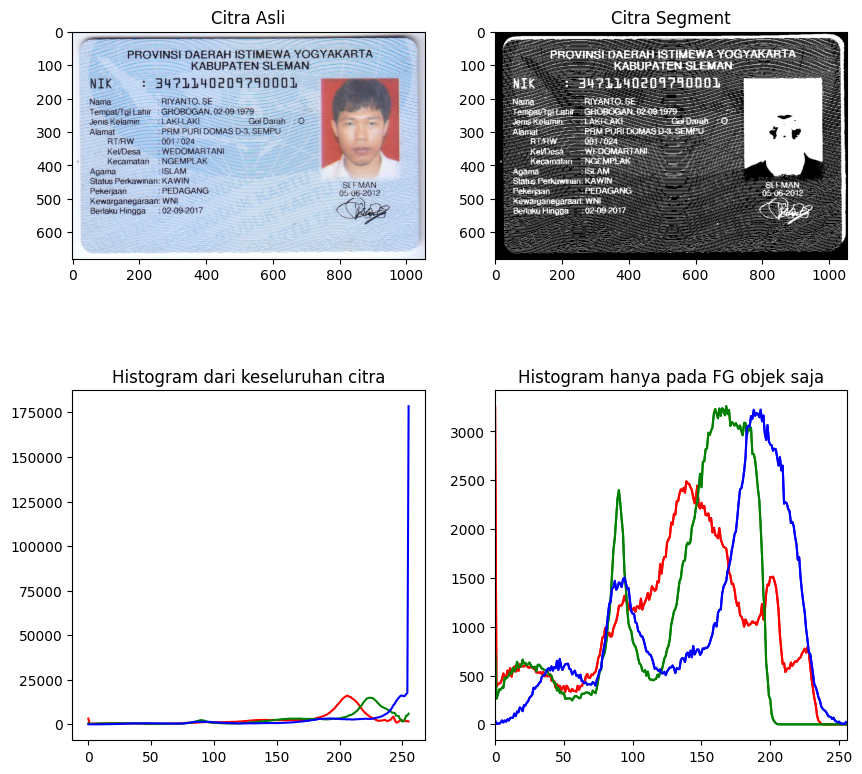

In [95]:
filename_3 = ('/content/drive/MyDrive/content/ktpRiyanto.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

## Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

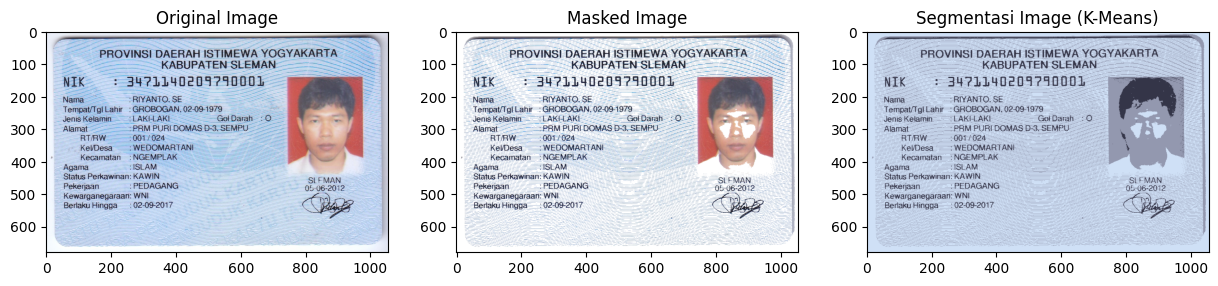

In [96]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/content/ktpRiyanto.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 1
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(1, 3, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

## Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.


### 1. Install PIP OCR

In [97]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


### 2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [98]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

### 3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [99]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/content/ktpRiyanto.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


### 4. Menambahkan kotak untuk deteksi teksi pada gambar

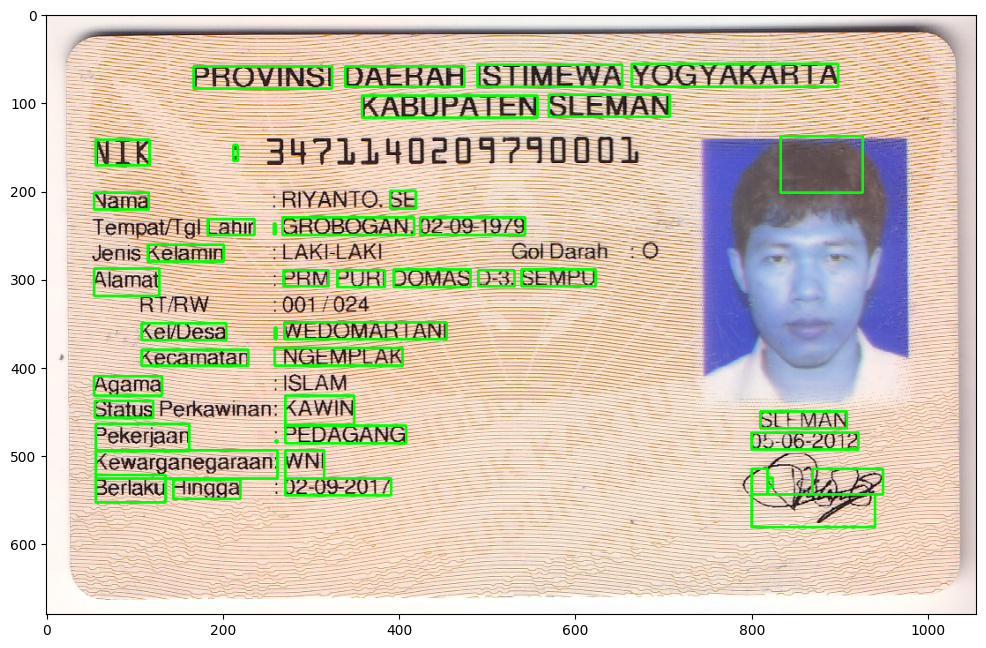

In [100]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i],
text1['width'][i], text1['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



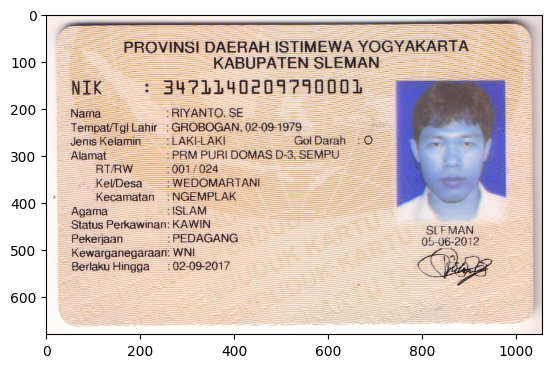

In [101]:
img = cv2.imread("/content/drive/MyDrive/content/ktpRiyanto.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

## Tugas Praktikum

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



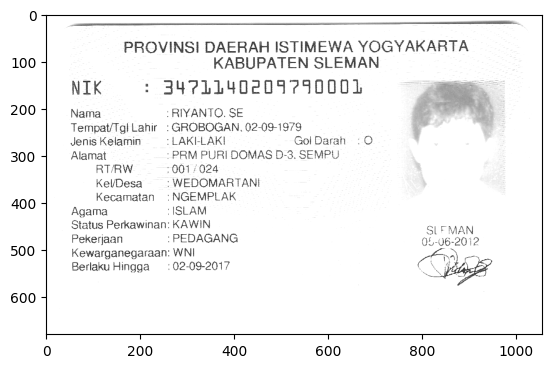

In [103]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

img = cv2.imread("/content/drive/MyDrive/content/ktpRiyanto.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)

plt.imshow(threshed, cmap='gray')
plt.show()